In [0]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.metrics import roc_curve, auc  
import tensorflow as tf
import tensorflow_probability as tfp

from training import create_models
from models import Model, DefaultDenseModel, DefaultConvModel, McDropoutModel, BayesByBackpropModel
import commons

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
trainingset_proportion = 0.5
embedding_dim = 50
batch_size = 128
epochs = 50

glove_dir = "./drive/My Drive/haw/master/mastertheisis/hauptprojekt/glove"
evaluation_folder = "./drive/My Drive/haw/master/mastertheisis/hauptprojekt/evaluation/"
history_evaluation_folder = evaluation_folder + "history/"
models_dir = "./drive/My Drive/haw/master/mastertheisis/hauptprojekt/training/models"
history_dir = "./drive/My Drive/haw/master/mastertheisis/hauptprojekt/training/history"

commons.one_time_setup()
setup = commons.setup(glove_dir=glove_dir,
                      embedding_dim=embedding_dim,
                      trainingset_proportion=trainingset_proportion)
models = create_models(setup, models_dir, history_dir)

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


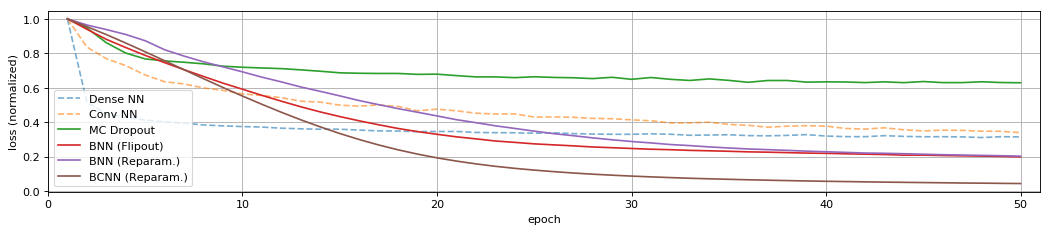

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


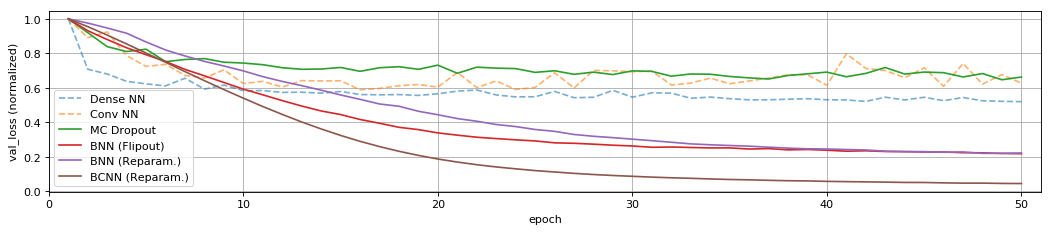

using saved model
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


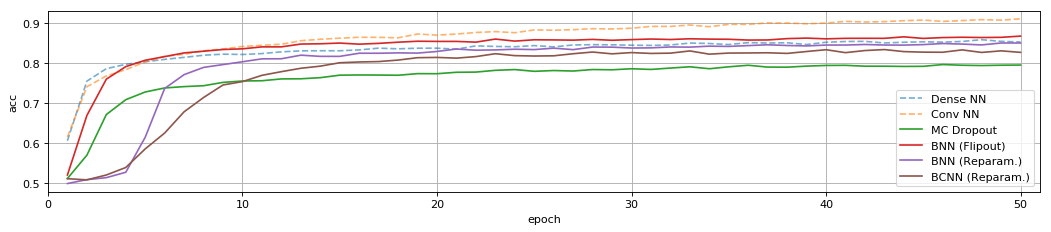

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


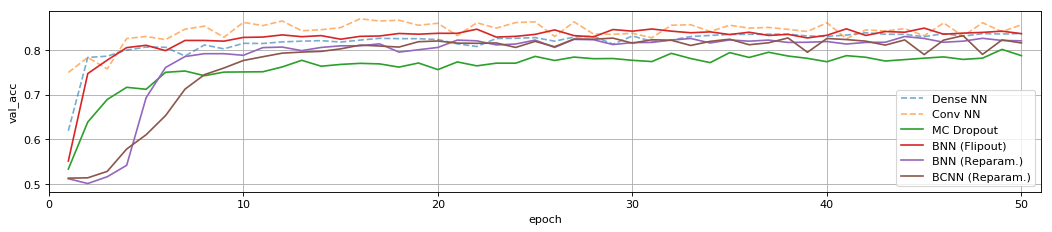

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


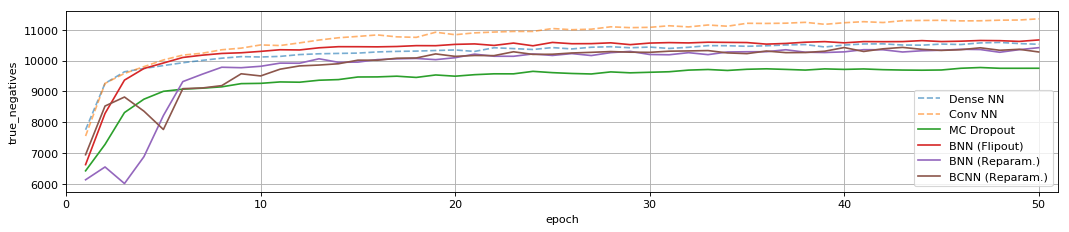

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


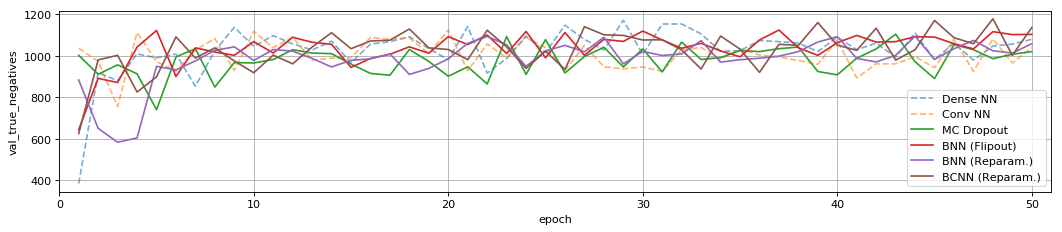

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


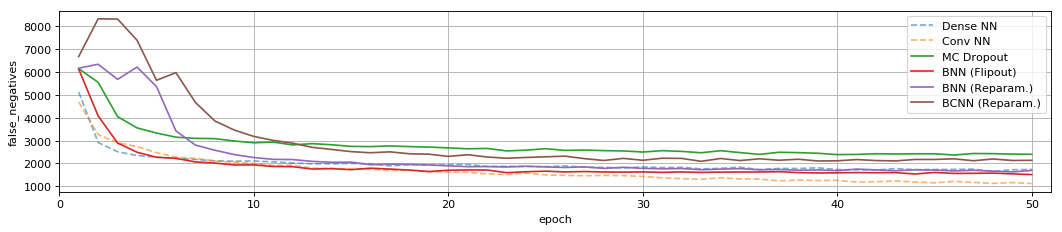

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


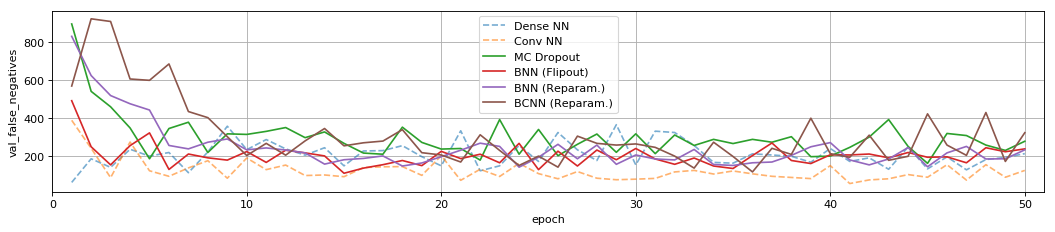

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


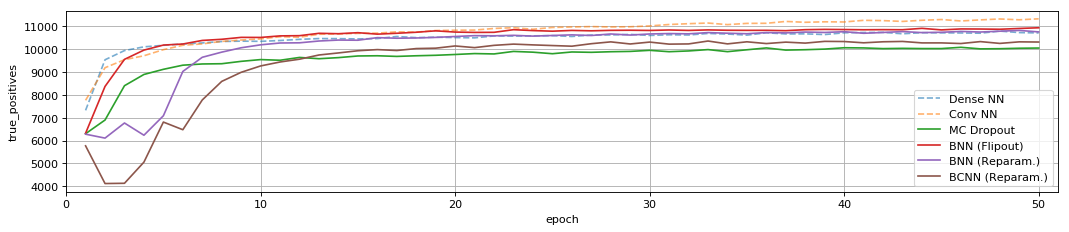

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


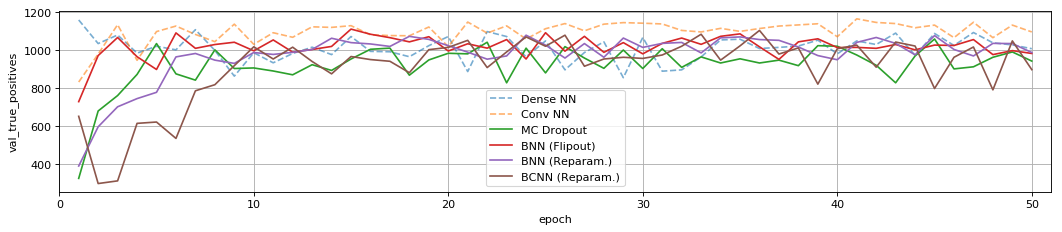

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


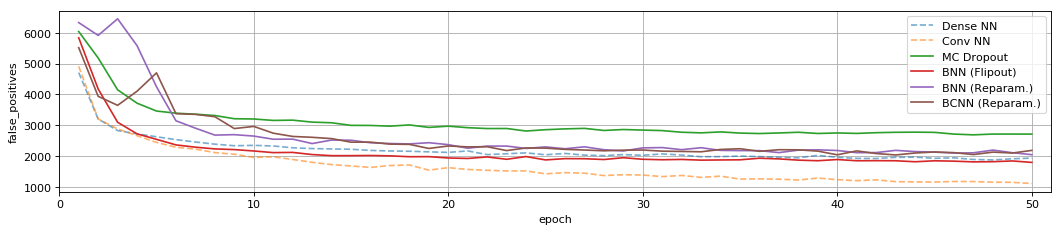

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


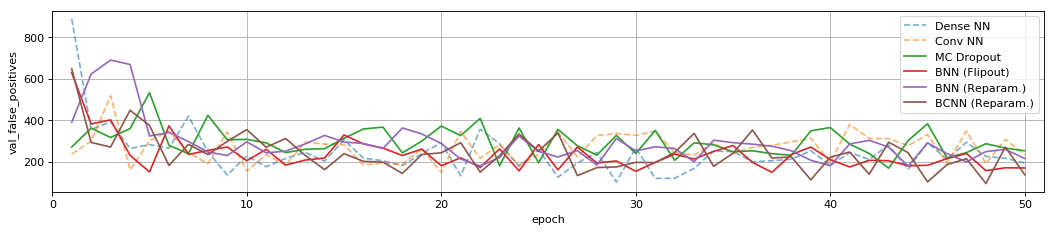

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


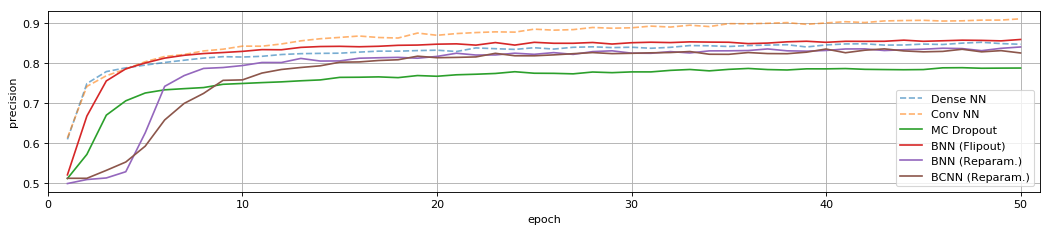

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


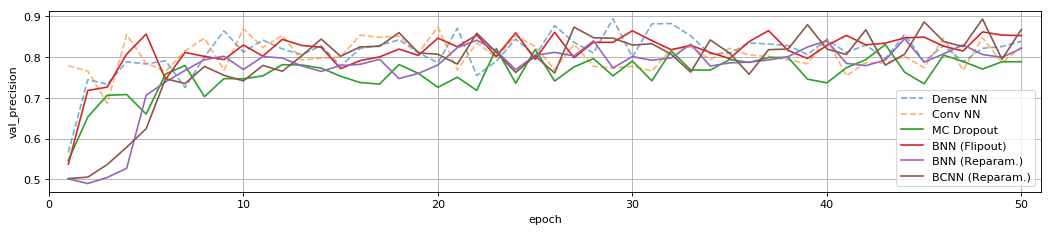

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


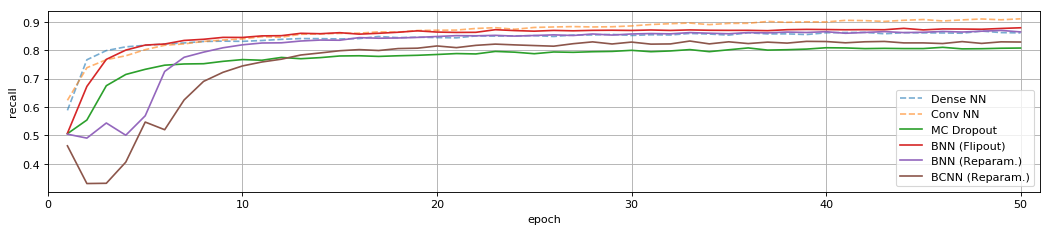

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


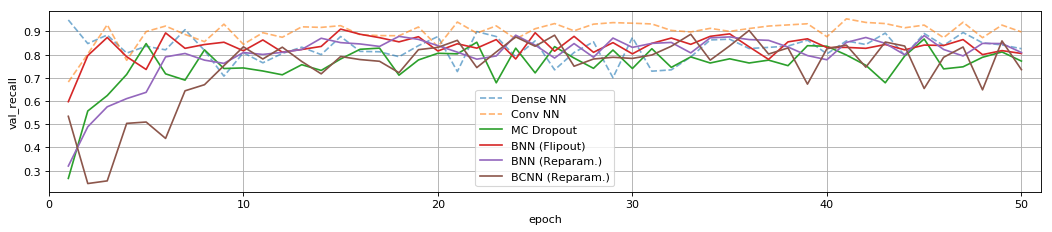

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


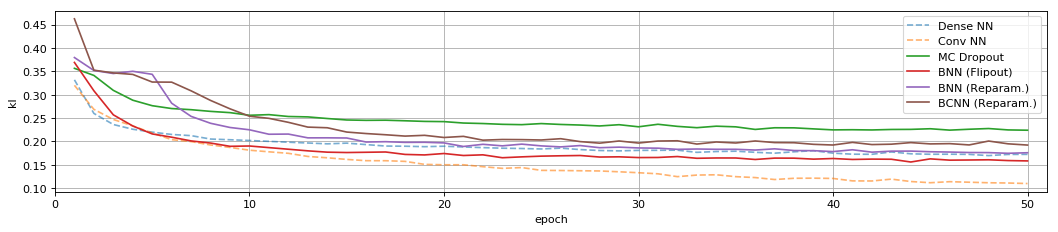

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


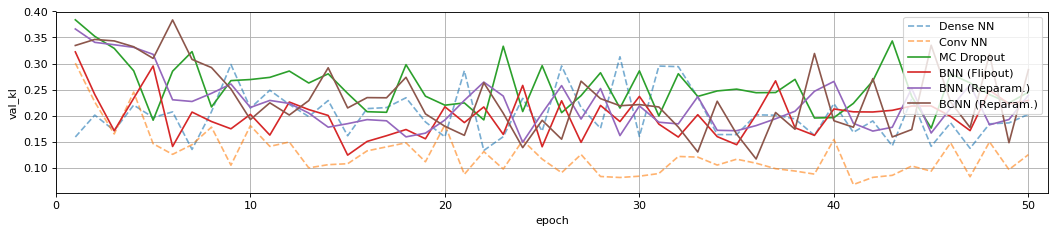

In [0]:
# evaluate history
def plot_metric(col_name, is_training=True, normalize=False):
    figure(num=None, figsize=(16, 3), dpi=80)

    for model in models:
        (history, last_epoch) = model.load_history()
        y_label = col_name

        if is_training:
            col = col_name
        else:
            col = "val_%s" % col_name
            y_label = col

        if normalize:
            norm_factor = 1./np.max(history[col][:50])
            y_label += (" (normalized)")
        else:
            norm_factor = 1.
            
        if model.is_variational():
            linestyle = "-"
            alpha = 1.0
        else:
            alpha = 0.6
            linestyle = "--"
            
        plt.plot(np.arange(1, epochs + 1, 1), history[col][:50] * norm_factor, alpha=alpha, linestyle=linestyle)


    plt.legend([model.readable_name() for model in models])
    plt.xlabel("epoch")
    plt.ylabel(y_label)
    plt.xlim([0, epochs + 1])
    plt.grid()
    plt.savefig(history_evaluation_folder + str(int(models[0].N)) + "_" + col + ".pdf", bbox_inches = 'tight', pad_inches = 0)
    plt.show()


plot_metric("loss", True, normalize=True)
plot_metric("loss", False, normalize=True)

metric_names = list(filter(lambda m: m is not "loss" and m is not "val_loss", models[0].load_model().metrics_names))
for metric in metric_names:
    plot_metric(metric, True)
    plot_metric(metric, False)

In [0]:
metric_names = list(map(lambda metric: "val_%s" % metric, models[0].load_model().metrics_names))
dataset_sizes=[0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.005]
Nx = []
Ny_histories = []
for dataset_size in dataset_sizes:
    setup = commons.setup(glove_dir=glove_dir,
                      embedding_dim=embedding_dim,
                      trainingset_proportion=dataset_size)
    models = create_models(setup, models_dir, history_dir)
    
    Nx += [models[0].N]
    Ny_histories += [[model.load_history()[0] for model in models]]

using saved model
Found 400000 word vectors.
17361/88587 unknown words
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Found 400000 word vectors.
17361/88587 unknown words
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Found 400000 word vectors.
17361/88587 unknown words
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Found 400000 word vectors.
1736

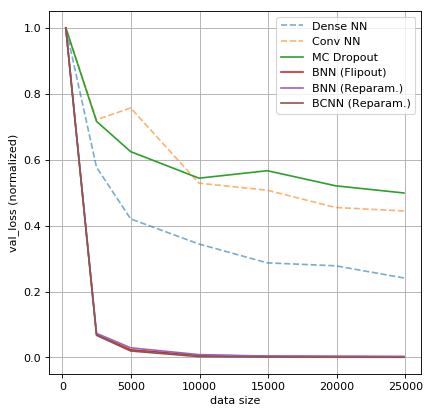

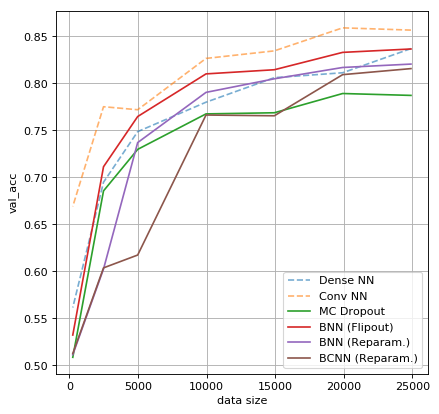

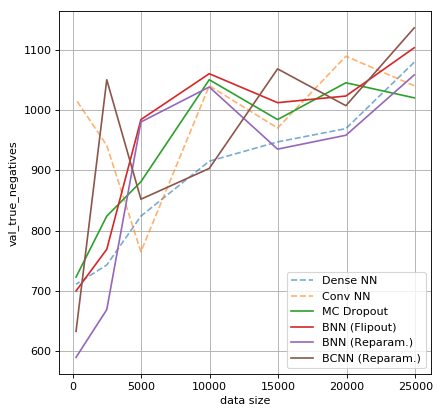

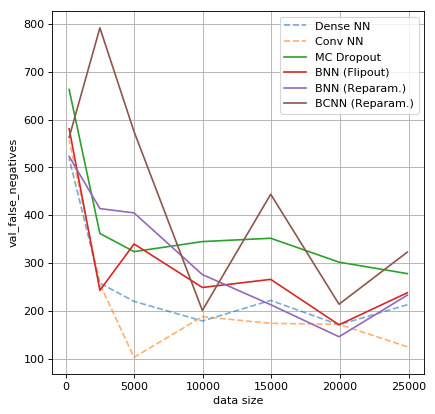

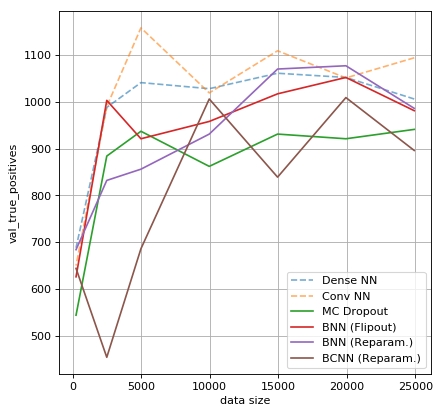

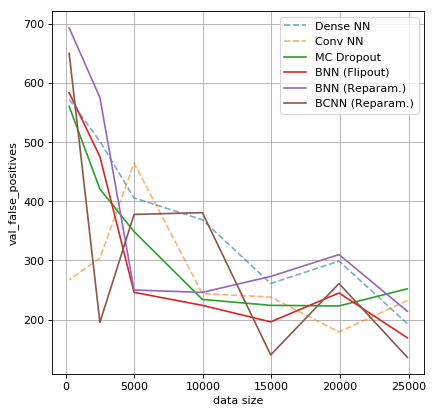

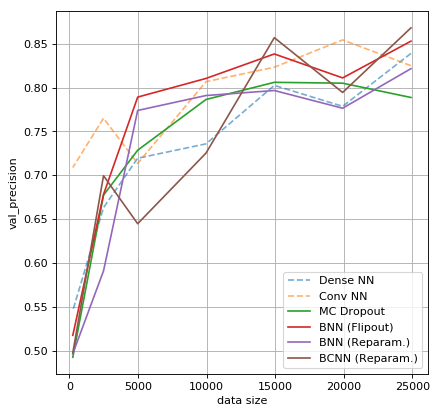

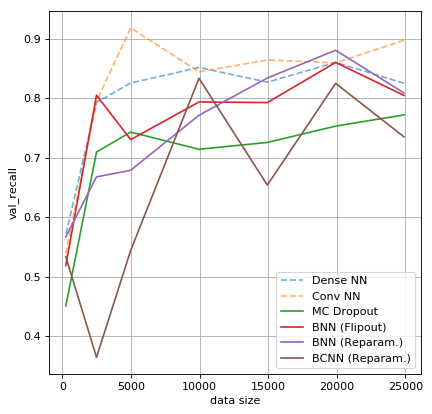

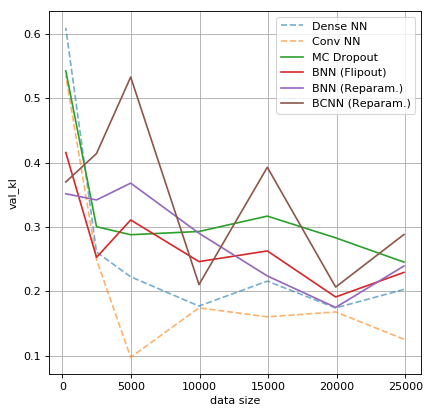

In [0]:
for metric in metric_names:
    figure(num=None, figsize=(6, 6), dpi=80)
    
    for m in range(len(models)):
        model = models[m]
        y_label = metric

        if model.is_variational():
            linestyle = "-"
            alpha = 1.0
        else:
            alpha = 0.6
            linestyle = "--"
            
        norm_factor = 1.
        Ny = []
        for history in Ny_histories:
            col = history[m][metric]
            Ny += [col.iloc[-1]]
            
        if metric == "loss" or metric == "val_loss":
            norm_factor = 1./np.max(Ny)
        plt.plot(Nx, np.array(Ny) * norm_factor, alpha=alpha, linestyle=linestyle)   
        
    if metric == "loss" or metric == "val_loss":
        y_label += (" (normalized)")
        
    plt.legend([model.readable_name() for model in models])
    plt.xlabel("data size")
    plt.ylabel(y_label)
    plt.grid()
    plt.savefig(history_evaluation_folder + metric + "_varrying_n" + ".pdf", bbox_inches = 'tight', pad_inches = 0)
    plt.show()

In [0]:
# testing all models

def calc_f1_score(precision, recall):
  return (2 * precision * recall) / (precision + recall)

samples = 5
for model in models:
    print(model.readable_name())
    (x_test, x_test_padded, y_test) = model.testing_data
    loaded_model = model.load_model()
    evaluation = np.array([loaded_model.evaluate(x_test_padded, y_test) for i in range(samples)])
    means = np.mean(evaluation, axis=0)
    stds = np.std(evaluation, axis=0)

    (loss_m, acc_m, true_negatives_m, false_negatives_m, true_positives_m, false_positives_m, precision_m, recall_m, kl_m) = means
    (loss_std, acc_std, true_negatives_std, false_negatives_std, true_positives_std, false_positives_std, precision_std, recall_std, kl_std) = stds
    
    f1score_min = calc_f1_score(precision_m - precision_std, recall_m - recall_std)
    f1score_max = calc_f1_score(precision_m + precision_std, recall_m + recall_std)
    
    print("\n----")
    print(model.readable_name())
    print("Accuracy: %.3f +- %.3f" % (acc_m, acc_std * 2))   
    print("Precision: %.3f +- %.3f" % (precision_m, precision_std * 2))    
    print("Recall: %.3f +- %.3f" % (recall_m, recall_std * 2))
    print("F1 score: %.3f +- %.3f" % (np.mean([f1score_min, f1score_max]), np.std([f1score_min, f1score_max])))

Dense NN
using saved model
22419/22419 [==============================] - 3s 147us/sample - loss: 0.4698 - acc: 0.8255 - true_negatives: 9231.0000 - false_negatives: 1965.0000 - true_positives: 9276.0000 - false_positives: 1947.0000 - precision: 0.8265 - recall: 0.8252 - kl: 0.2162

----
Dense NN
Accuracy: 0.826 +- 0.000
Precision: 0.827 +- 0.000
Recall: 0.825 +- 0.000
F1 score: 0.826 +- 0.000
Conv NN
using saved model
22419/22419 [==============================] - 3s 118us/sample - loss: 0.3410 - acc: 0.8501 - true_negatives: 9110.0000 - false_negatives: 1292.0000 - true_positives: 9949.0000 - false_positives: 2068.0000 - precision: 0.8279 - recall: 0.8851 - kl: 0.1374

----
Conv NN
Accuracy: 0.850 +- 0.000
Precision: 0.828 +- 0.000
Recall: 0.885 +- 0.000
F1 score: 0.856 +- 0.000
MC Dropout
using saved model
22419/22419 [==============================] - 4s 173us/sample - loss: 0.4814 - acc: 0.7775 - true_negatives: 8408.0000 - false_negatives: 2218.0000 - true_positives: 9023.0000 - 

In [0]:
# Scatter plot word count by uncertainty
bayes_by_backprop_model = BayesByBackpropModel(model_setup=setup,
                                               models_dir=models_dir,
                                               history_dir=history_dir,
                                               variational_layer=tfp.layers.DenseFlipout,
                                               neurons_hidden_layers=[64, 64, 32])


[x_test, x_test_padded, y_test] = bayes_by_backprop_model.testing_data

word_counts = list(map(lambda d: len(d), x_test))
test_data = zip(word_counts, x_test_padded, y_test)
(x_test_sorted, x_test_padded_sorted, y_test_sorted) = zip(*sorted(test_data, key=lambda tup: tup[0]))


loaded_model = bayes_by_backprop_model.load_model()
predictions = [loaded_model.predict(np.array(x_test_padded_sorted), verbose=1) for i in range(10)]  

W0701 21:40:04.456665 140516219979648 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


using saved model
22419/22419 [==============================] - 5s 235us/sample


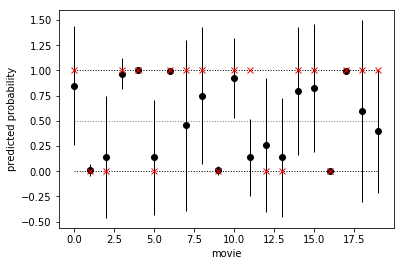

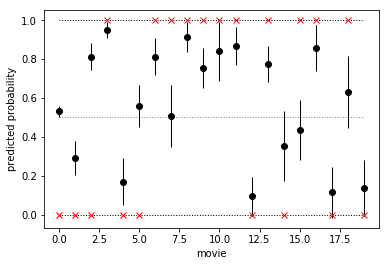

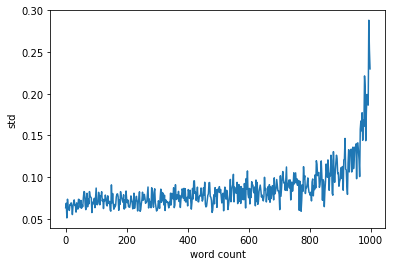

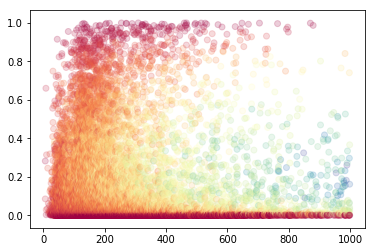

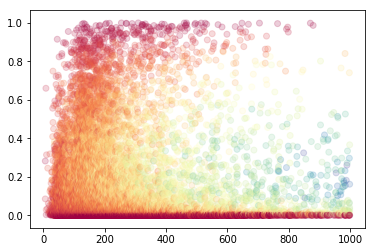

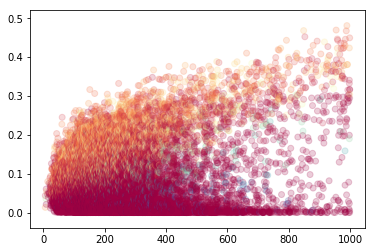

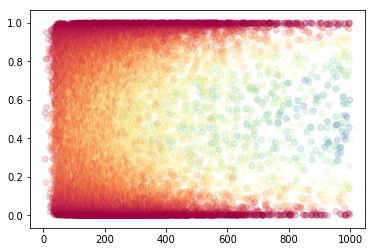

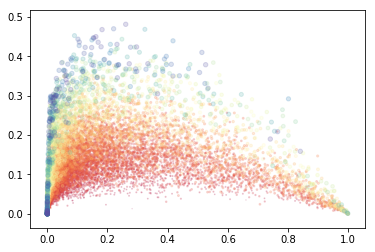

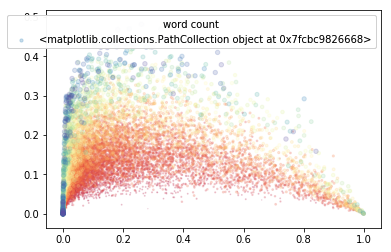

In [0]:
def scatter_confidence_by_word_count(predictions):
  means = np.squeeze(np.mean(predictions, axis=0))
  stds = np.squeeze(np.std(predictions, axis=0))
  mse = np.square(means - y_test_sorted)
  word_counts_sorted = sorted(word_counts)
  
  commons.plot_confidence(means=means[-20:], stddevs=stds[-20:], true_ys=y_test_sorted[-20:])
  commons.plot_confidence(means=means[:20], stddevs=stds[:20], true_ys=y_test_sorted[:20])
    
  std_bins = np.mean(stds[419:].reshape((500, 44)), axis=1)
  plt.plot(np.arange(0, 1000, 2), std_bins)
  plt.xlabel("word count")
  plt.ylabel("std")
  plt.show()

  plt.scatter(x=word_counts_sorted, y=mse, c=stds, alpha=0.2, cmap="Spectral")
  plt.show()
  
  plt.scatter(x=word_counts_sorted, y=mse, c=stds, alpha=0.2, cmap="Spectral")
  plt.show()

  plt.scatter(x=word_counts_sorted, y=stds, c=mse, alpha=0.2, cmap="Spectral")
  plt.show()
  
  plt.scatter(x=word_counts_sorted, y=means, c=stds, alpha=0.2, cmap="Spectral")
  plt.show()
  
  plt.scatter(x=mse, y=stds, c=word_counts_sorted, alpha=0.2, s = np.array(word_counts_sorted) / 50, cmap="Spectral")
  plt.show()
  
  fig, ax = plt.subplots()  
  scatter = ax.scatter(x=mse, y=stds, c=word_counts_sorted, s = np.array(word_counts_sorted) / 50, alpha=0.2, cmap="Spectral")
  legend = ax.legend(scatter, loc="upper right", title="word count")
  ax.add_artist(legend)
  plt.show()
  
scatter_confidence_by_word_count(predictions)



In [0]:
model_predictions = [model.load_model().predict(model.testing_data[1]) for model in models]

W0703 15:34:56.917538 139688918517632 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0703 15:34:56.918491 139688918517632 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0703 15:34:56.921515 139688918517632 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtyp

using saved model
using saved model
using saved model
using saved model
using saved model
using saved model


using saved model
22419/22419 [==============================] - 3s 151us/sample - loss: 0.4698 - acc: 0.8255 - true_negatives: 9231.0000 - false_negatives: 1965.0000 - true_positives: 9276.0000 - false_positives: 1947.0000 - precision: 0.8265 - recall: 0.8252 - kl: 0.2162
using saved model
22419/22419 [==============================] - 3s 129us/sample - loss: 0.3410 - acc: 0.8501 - true_negatives: 9110.0000 - false_negatives: 1292.0000 - true_positives: 9949.0000 - false_positives: 2068.0000 - precision: 0.8279 - recall: 0.8851 - kl: 0.1374
using saved model
22419/22419 [==============================] - 4s 189us/sample - loss: 0.4820 - acc: 0.7794 - true_negatives: 8432.0000 - false_negatives: 2200.0000 - true_positives: 9041.0000 - false_positives: 2746.0000 - precision: 0.7670 - recall: 0.8043 - kl: 0.2312
using saved model
22419/22419 [==============================] - 7s 293us/sample - loss: 1.0430 - acc: 0.8334 - true_negatives: 9539.0000 - false_negatives: 2096.0000 - true_posi

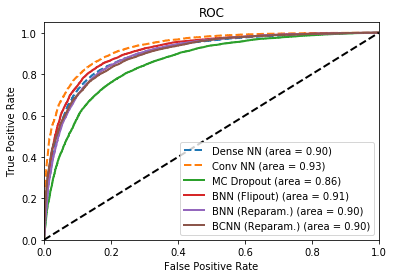

[0.8258546652513601, 0.8555335836385564, 0.785217992194605, 0.8304200322581227, 0.8238656122432029, 0.7999432730228367]


In [0]:
fprs = []
tprs = []
aucs = []
for i in range(len(models)):
  model = models[i]
  scores = model_predictions[i]
  y_true = model.testing_data[2]
  fpr, tpr, thresholds = roc_curve(y_true, scores)
  auc_m = auc(fpr, tpr)
  
  fprs += [fpr]
  tprs += [tpr]
  aucs += [auc_m]

plt.figure()

for model, fpr, tpr, auc_m in zip(models, fprs, tprs, aucs):
  plt.plot(fpr, tpr, lw=2,
           linestyle= '-' if model.is_variational() else '--',
           label='{0} (area = {1:0.2f})'.format(model.readable_name(), auc_m))
  
lw = 2
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig(evaluation_folder + "roc.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [0]:
# high and low uncertainty
def predict_n_times(n, model):
  model_loaded = model.load_model()
  x_test = model.testing_data[0]
  x_test_padded = model.testing_data[1]
  y_true = model.testing_data[2]
  predictions = [model_loaded.predict(x_test_padded) for i in range(n)]
  return (predictions, x_test, y_true)

def sort_data_by(key, x, y_true, model_preds):
  keys = ["std", "mean", "x", "y"]
  i = keys.index(key)
  
  stds = np.squeeze(np.std(model_preds, axis=0))
  means = np.squeeze(np.mean(model_preds, axis=0))
  test_data = zip(stds, means, x, y_true)
  return zip(*sorted(test_data, key=lambda tup: tup[i]))

bnn_flipout_model_preds, bnn_flipout_model_x, bnn_flipout_model_y = predict_n_times(15, models[4])

using saved model


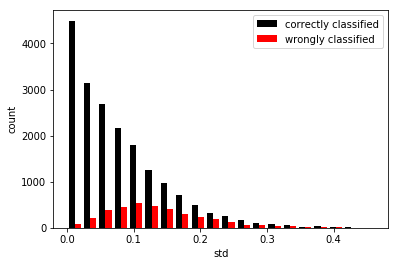

std: 0.000, word_avg: 1167.7 -> <START> okay wait let me get this street there are actually some morons on this site who reckon this is one of the better if not the best halloween sequel i even read someone saying it was just as good as the original pah what nonsense don't believe them i've watched every halloween and clearly unlike some people knows what makes at the very least a good horror movie and this shower of s is one of the worst horror movies i have ever seen in my life frankly if i was john carpenter i would sue the person who wrote this either that or go around to his or her place with a hunting rifle seriously halloween sequels in general are nearly all rubbish two was crap three was stupid four is alright five is well five h20 alright resurrection painful yet in many ways i find this to be the worst of a very bad bunch of sequels why well let me just embark on some kind of rant not so much a review but a mindless rant on why halloween 6 the cure of michael myers is one of

In [0]:
def std_evaluation():
  (stds_sorted, means_sorted, x_sorted, y_sorted) = sort_data_by("std", bnn_flipout_model_x, bnn_flipout_model_y, bnn_flipout_model_preds)

  stds_sorted = np.array(stds_sorted)
  
  correct = np.round(means_sorted) == np.array(y_sorted)
  wrong = correct == 0
  
  correct_cum = np.cumsum(correct)
  errors_cum = np.cumsum(wrong)
  
  x = stds_sorted

  fig, axes = plt.subplots()
  axes.hist([stds_sorted[correct], stds_sorted[wrong]], color=["black", "red"], bins=20, label=["correctly classified", "wrongly classified"])
  plt.xlabel("std")
  plt.ylabel("count")
  plt.legend(loc='best')
  plt.savefig(evaluation_folder + "std_wrong_correct.pdf", bbox_inches = 'tight', pad_inches = 0)
  plt.show()

  # low and high data uncertainty
  for i in [0, 1, 2, 3, 4, -1, -2, -3, -4, -5]:
    print("std: %.3f, word_avg: %.1f -> %s" % (stds_sorted[i], np.mean(x_sorted[i]), setup["word_index"].vec2sentence(x_sorted[i])))
    
std_evaluation(